In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import load_data
import pathlib

# Experiment I: Setup and an Initial Test

In [2]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(layers.Flatten())
model.add(layers.Dense(576, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax')) 

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['categorical_accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [8]:
dim_old = 28
dim_new = None
dat_path = pathlib.Path('object_files/').glob('*.npz')
d = {"lollipop":0, "canoe":1, "penguin":2, "eyeglasses":3, "apple":4, "moon":5, "cup":6}
train, train_labels, valid, valid_labels, test, test_labels = load_data.load_for_cnn(dat_path, 
                                                                                     dim_old, d, (0.7, 0.25), 
                                                                                     channel_axes=1, 
                                                                                     dim_new=dim_new)
train_dataset = tf.data.Dataset.from_tensor_slices((train, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test, test_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid, valid_labels))

batch_size = 64
train_batches = train_dataset.shuffle(len(train)).repeat().batch(batch_size)
validation_batches = valid_dataset.shuffle(len(valid)).repeat().batch(batch_size)

In [13]:
print(len(valid)/ batch_size) 

82.03125


In [ ]:
history = model.fit(train_batches, epochs=20, validation_data=validation_batches)

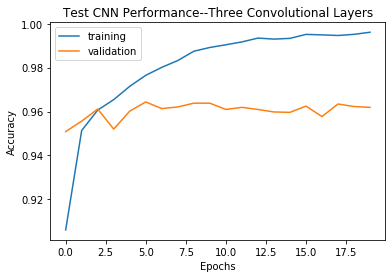

In [10]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test CNN Performance--Three Convolutional Layers")
plt.plot(history.history['categorical_accuracy'], label='training')
plt.plot(history.history['val_categorical_accuracy'], label='validation')
plt.legend()

In [9]:
test_batches = test_dataset.shuffle(len(test)).batch(batch_size)
loss_test, accuracy_test = model.evaluate(test_batches)

247/247 [==============================] - 2s 9ms/step - loss: 0.2787 - categorical_accuracy: 0.9589


# Experiment II: Optimizing Batch Size and Learning Rate

Using the architecture above, optimize the batch size and the learning rate

0.0001
Epoch 1/15
766/766 [==============================] - 35s 46ms/step - loss: 0.5868 - categorical_accuracy: 0.8280 - val_loss: 0.3068 - val_categorical_accuracy: 0.9138
Epoch 2/15
766/766 [==============================] - 29s 37ms/step - loss: 0.2640 - categorical_accuracy: 0.9221 - val_loss: 0.2242 - val_categorical_accuracy: 0.9354
Epoch 3/15
766/766 [==============================] - 30s 39ms/step - loss: 0.2114 - categorical_accuracy: 0.9378 - val_loss: 0.1953 - val_categorical_accuracy: 0.9415
Epoch 4/15
766/766 [==============================] - 28s 37ms/step - loss: 0.1894 - categorical_accuracy: 0.9433 - val_loss: 0.1934 - val_categorical_accuracy: 0.9405
Epoch 5/15
766/766 [==============================] - 29s 38ms/step - loss: 0.1717 - categorical_accuracy: 0.9486 - val_loss: 0.1790 - val_categorical_accuracy: 0.9458
Epoch 6/15
766/766 [==============================] - 26s 34ms/step - loss: 0.1573 - categorical_accuracy: 0.9529 - val_loss: 0.1589 - val_categorical_ac

766/766 [==============================] - 25s 32ms/step - loss: 0.1357 - categorical_accuracy: 0.9598 - val_loss: 0.1654 - val_categorical_accuracy: 0.9550
Epoch 8/15
766/766 [==============================] - 25s 32ms/step - loss: 0.1331 - categorical_accuracy: 0.9606 - val_loss: 0.1868 - val_categorical_accuracy: 0.9473
Epoch 9/15
766/766 [==============================] - 25s 32ms/step - loss: 0.1292 - categorical_accuracy: 0.9629 - val_loss: 0.1779 - val_categorical_accuracy: 0.9499
Epoch 10/15
766/766 [==============================] - 24s 32ms/step - loss: 0.1243 - categorical_accuracy: 0.9638 - val_loss: 0.1743 - val_categorical_accuracy: 0.9558
Epoch 11/15
766/766 [==============================] - 24s 32ms/step - loss: 0.1186 - categorical_accuracy: 0.9657 - val_loss: 0.1723 - val_categorical_accuracy: 0.9520
Epoch 12/15
766/766 [==============================] - 25s 32ms/step - loss: 0.1158 - categorical_accuracy: 0.9664 - val_loss: 0.1756 - val_categorical_accuracy: 0.9554


ValueError: x and y must have same first dimension, but have shapes (10,) and (15,)

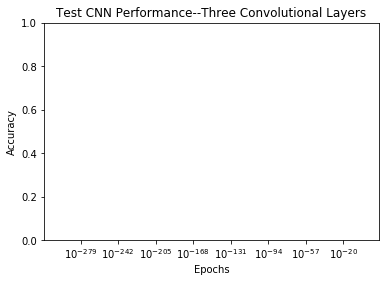

In [23]:
history = []
trial_lr = np.linspace(0.0001, 0.01, 10)

for lr in trial_lr:
    print(lr)
    adam = tf.keras.optimizers.Adam(lr=lr)
    model = keras.Sequential()
    model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(layers.Flatten())
    model.add(layers.Dense(576, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(7, activation='softmax')) 
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['categorical_accuracy'])
    history.append(model.fit(train_batches, epochs=15, steps_per_epoch=766, 
                             validation_data=validation_batches, validation_steps=83))
    
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test CNN Performance--Three Convolutional Layers")
for i in range(len(history)):
    plt.semilogx(trial_lr, history[i].history['val_categorical_accuracy'], label='lr=' + str(trial_lr[i]))
plt.legend()
plt.show()

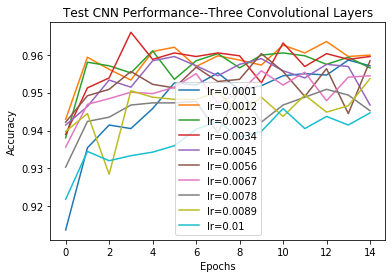

In [32]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test CNN Performance--Three Convolutional Layers")
for i in range(len(history)):
    # plt.plot(history[i].history['categorical_accuracy'], label='training')
    plt.plot(history[i].history['val_categorical_accuracy'], label='lr=' + str(round(trial_lr[i], 4)))
plt.legend()
plt.show()

Epoch 1/15
766/766 [==============================] - 23s 30ms/step - loss: 0.4893 - categorical_accuracy: 0.8407 - val_loss: 0.2794 - val_categorical_accuracy: 0.9096
Epoch 2/15
766/766 [==============================] - 25s 33ms/step - loss: 0.2461 - categorical_accuracy: 0.9280 - val_loss: 0.3093 - val_categorical_accuracy: 0.9036
Epoch 3/15
766/766 [==============================] - 17s 23ms/step - loss: 0.2405 - categorical_accuracy: 0.9280 - val_loss: 0.1773 - val_categorical_accuracy: 0.9458
Epoch 4/15
766/766 [==============================] - 18s 24ms/step - loss: 0.2036 - categorical_accuracy: 0.9404 - val_loss: 0.1800 - val_categorical_accuracy: 0.9443
Epoch 5/15
766/766 [==============================] - 16s 21ms/step - loss: 0.2274 - categorical_accuracy: 0.9328 - val_loss: 0.1707 - val_categorical_accuracy: 0.9473
Epoch 6/15
766/766 [==============================] - 14s 18ms/step - loss: 0.1860 - categorical_accuracy: 0.9479 - val_loss: 0.1620 - val_categorical_accuracy:

Epoch 5/15
766/766 [==============================] - 23s 30ms/step - loss: 0.0892 - categorical_accuracy: 0.9718 - val_loss: 0.1353 - val_categorical_accuracy: 0.9593
Epoch 6/15
766/766 [==============================] - 23s 30ms/step - loss: 0.0769 - categorical_accuracy: 0.9751 - val_loss: 0.1459 - val_categorical_accuracy: 0.9603
Epoch 7/15
766/766 [==============================] - 23s 30ms/step - loss: 0.0607 - categorical_accuracy: 0.9803 - val_loss: 0.1480 - val_categorical_accuracy: 0.9582
Epoch 8/15
766/766 [==============================] - 25s 33ms/step - loss: 0.0503 - categorical_accuracy: 0.9840 - val_loss: 0.1996 - val_categorical_accuracy: 0.9524
Epoch 9/15
766/766 [==============================] - 24s 31ms/step - loss: 0.0439 - categorical_accuracy: 0.9859 - val_loss: 0.1658 - val_categorical_accuracy: 0.9637
Epoch 10/15
766/766 [==============================] - 23s 30ms/step - loss: 0.0319 - categorical_accuracy: 0.9893 - val_loss: 0.1969 - val_categorical_accuracy

ValueError: x and y must have same first dimension, but have shapes (5,) and (15,)

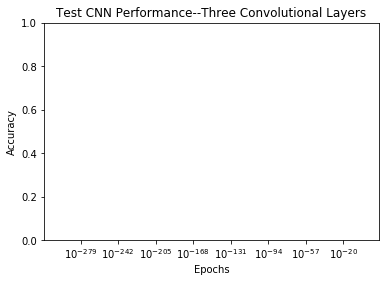

In [24]:
history_batches = []
trial_batches = [8, 16, 32, 64, 128]

for batch_size in trial_batches:
    train_batches = train_dataset.shuffle(len(train)).repeat().batch(batch_size)
    validation_batches = valid_dataset.shuffle(len(valid)).repeat().batch(batch_size)
    
    adam = tf.keras.optimizers.Adam(lr=0.001)
    model = keras.Sequential()
    model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(layers.Flatten())
    model.add(layers.Dense(576, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(7, activation='softmax')) 
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['categorical_accuracy'])
    history_batches.append(model.fit(train_batches, epochs=15, steps_per_epoch=766, 
                             validation_data=validation_batches, validation_steps=83))

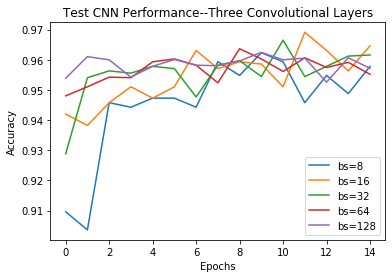

In [28]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test CNN Performance--Three Convolutional Layers")
for i in range(len(history_batches)):
    # plt.plot(history[i].history['categorical_accuracy'], label='training')
    plt.plot(history_batches[i].history['val_categorical_accuracy'], label='bs=' + str(trial_batches[i]))
plt.legend()
plt.show()

# Experiment III: Optimizing Width and Depth

bs = 64 and lr = 0.003 seem like good choices from these optimizations--now we will do some crude
width and depth optimizations

In [46]:
train_batches = train_dataset.shuffle(len(train)).repeat().batch(64)
validation_batches = valid_dataset.shuffle(len(valid)).repeat().batch(64)

In [48]:
# For fun, let's try a bunch of "flat" architectures:

filters = [16, 32, 64]

history_width_depth = []

for model_n in range(3):
    for filters_n in filters:
        if model_n == 0:
            model = keras.Sequential()
            model.add(layers.Convolution2D(filters_n, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Convolution2D(filters_n, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Flatten())
            model.add(layers.Dense(filters_n * 7 * 7, activation='relu'))
            model.add(layers.Dense(128, activation='relu'))
            model.add(layers.Dense(7, activation='softmax')) 
        elif model_n == 1:
            model = keras.Sequential()
            model.add(layers.Convolution2D(filters_n, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Convolution2D(filters_n, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Convolution2D(filters_n, (2, 2), padding='valid', activation= 'relu', data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Flatten())
            model.add(layers.Dense(filters_n * 3 * 3, activation='relu'))
            model.add(layers.Dense(64, activation='relu'))
            model.add(layers.Dense(7, activation='softmax')) 
        else:
            model = keras.Sequential()
            model.add(layers.Convolution2D(filters_n, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Convolution2D(filters_n, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Convolution2D(filters_n, (2, 2), padding='valid', activation= 'relu', data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Convolution2D(filters_n, (2, 2), padding='valid', activation= 'relu', data_format='channels_last'))
            model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
            model.add(layers.Flatten())
            model.add(layers.Dense(filters_n, activation='relu'))
            model.add(layers.Dense(7, activation='softmax')) 
        adam = tf.keras.optimizers.Adam(lr=0.003)
        model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['categorical_accuracy'])
        history_width_depth.append(model.fit(train_batches, epochs=50, steps_per_epoch=766, 
                                             validation_data=validation_batches, validation_steps=83))

Epoch 1/50
766/766 [==============================] - 55s 72ms/step - loss: 0.2608 - categorical_accuracy: 0.9191 - val_loss: 0.1829 - val_categorical_accuracy: 0.9428
Epoch 2/50
766/766 [==============================] - 27s 35ms/step - loss: 0.1497 - categorical_accuracy: 0.9543 - val_loss: 0.1541 - val_categorical_accuracy: 0.9537
Epoch 3/50
766/766 [==============================] - 26s 34ms/step - loss: 0.1193 - categorical_accuracy: 0.9625 - val_loss: 0.1701 - val_categorical_accuracy: 0.9497
Epoch 4/50
766/766 [==============================] - 26s 34ms/step - loss: 0.0937 - categorical_accuracy: 0.9706 - val_loss: 0.1494 - val_categorical_accuracy: 0.9569
Epoch 5/50
766/766 [==============================] - 26s 34ms/step - loss: 0.0748 - categorical_accuracy: 0.9760 - val_loss: 0.1675 - val_categorical_accuracy: 0.9565
Epoch 6/50
766/766 [==============================] - 30s 39ms/step - loss: 0.0603 - categorical_accuracy: 0.9802 - val_loss: 0.1982 - val_categorical_accuracy:

766/766 [==============================] - 66s 86ms/step - loss: 0.0455 - categorical_accuracy: 0.9947 - val_loss: 0.4983 - val_categorical_accuracy: 0.9529
Epoch 48/50
766/766 [==============================] - 66s 86ms/step - loss: 0.0300 - categorical_accuracy: 0.9963 - val_loss: 0.5004 - val_categorical_accuracy: 0.9601
Epoch 49/50
766/766 [==============================] - 66s 86ms/step - loss: 0.0606 - categorical_accuracy: 0.9939 - val_loss: 0.5320 - val_categorical_accuracy: 0.9597
Epoch 50/50
766/766 [==============================] - 66s 86ms/step - loss: 0.0625 - categorical_accuracy: 0.9938 - val_loss: 0.5621 - val_categorical_accuracy: 0.9535
Epoch 1/50
766/766 [==============================] - 226s 295ms/step - loss: 0.2594 - categorical_accuracy: 0.9200 - val_loss: 0.1892 - val_categorical_accuracy: 0.9450
Epoch 2/50
766/766 [==============================] - 214s 280ms/step - loss: 0.1526 - categorical_accuracy: 0.9534 - val_loss: 0.1539 - val_categorical_accuracy: 0.9

766/766 [==============================] - 12s 16ms/step - loss: 0.0445 - categorical_accuracy: 0.9858 - val_loss: 0.2674 - val_categorical_accuracy: 0.9520
Epoch 44/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0430 - categorical_accuracy: 0.9858 - val_loss: 0.2877 - val_categorical_accuracy: 0.9503
Epoch 45/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0487 - categorical_accuracy: 0.9850 - val_loss: 0.2711 - val_categorical_accuracy: 0.9514
Epoch 46/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0383 - categorical_accuracy: 0.9876 - val_loss: 0.3049 - val_categorical_accuracy: 0.9460
Epoch 47/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0405 - categorical_accuracy: 0.9868 - val_loss: 0.3120 - val_categorical_accuracy: 0.9507
Epoch 48/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0459 - categorical_accuracy: 0.9854 - val_loss: 0.2862 - val_categorical_accuracy: 0.951

766/766 [==============================] - 47s 62ms/step - loss: 0.0332 - categorical_accuracy: 0.9921 - val_loss: 0.3504 - val_categorical_accuracy: 0.9582
Epoch 40/50
766/766 [==============================] - 48s 62ms/step - loss: 0.0396 - categorical_accuracy: 0.9912 - val_loss: 0.2965 - val_categorical_accuracy: 0.9620
Epoch 41/50
766/766 [==============================] - 48s 62ms/step - loss: 0.0283 - categorical_accuracy: 0.9928 - val_loss: 0.3535 - val_categorical_accuracy: 0.9533
Epoch 42/50
766/766 [==============================] - 48s 62ms/step - loss: 0.0340 - categorical_accuracy: 0.9928 - val_loss: 0.2554 - val_categorical_accuracy: 0.9612
Epoch 43/50
766/766 [==============================] - 48s 62ms/step - loss: 0.0277 - categorical_accuracy: 0.9936 - val_loss: 0.2515 - val_categorical_accuracy: 0.9625
Epoch 44/50
766/766 [==============================] - 48s 62ms/step - loss: 0.0308 - categorical_accuracy: 0.9931 - val_loss: 0.2975 - val_categorical_accuracy: 0.959

766/766 [==============================] - 19s 24ms/step - loss: 0.0643 - categorical_accuracy: 0.9795 - val_loss: 0.1968 - val_categorical_accuracy: 0.9565
Epoch 36/50
766/766 [==============================] - 19s 24ms/step - loss: 0.0665 - categorical_accuracy: 0.9794 - val_loss: 0.1945 - val_categorical_accuracy: 0.9552
Epoch 37/50
766/766 [==============================] - 19s 24ms/step - loss: 0.0653 - categorical_accuracy: 0.9793 - val_loss: 0.1779 - val_categorical_accuracy: 0.9573
Epoch 38/50
766/766 [==============================] - 19s 24ms/step - loss: 0.0660 - categorical_accuracy: 0.9791 - val_loss: 0.1890 - val_categorical_accuracy: 0.9552
Epoch 39/50
766/766 [==============================] - 19s 24ms/step - loss: 0.0641 - categorical_accuracy: 0.9798 - val_loss: 0.2005 - val_categorical_accuracy: 0.9548
Epoch 40/50
766/766 [==============================] - 19s 24ms/step - loss: 0.0606 - categorical_accuracy: 0.9806 - val_loss: 0.2055 - val_categorical_accuracy: 0.953

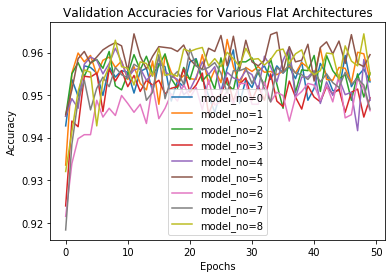

In [53]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracies for Various Flat Architectures")
for i in range(len(history_width_depth)):
    # plt.plot(history[i].history['categorical_accuracy'], label='training')
    plt.plot(history_width_depth[i].history['val_categorical_accuracy'], label='model_no=' + str(i))
plt.legend()
plt.show()

# Final tweak: LR scheduling

The conclusion of the previous testing is that we can't really go wrong here--changing the batch size, learning rate, and model architectures don't affect performance in a meaningful way. Let's see if we can do any better with some final tweaks. Returning to a similar model to what we started with:

In [32]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu', data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(layers.Flatten())
model.add(layers.Dense(576, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax')) 

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['categorical_accuracy'])

In [33]:
cb = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                          patience=5, min_lr=1e-5, verbose=1)]
dim_old = 28
dim_new = None
dat_path = pathlib.Path('object_files/').glob('*.npz')
d = {"lollipop":0, "canoe":1, "penguin":2, "eyeglasses":3, "apple":4, "moon":5, "cup":6}
train, train_labels, valid, valid_labels, test, test_labels = load_data.load_for_cnn(dat_path, 
                                                                                     dim_old, d, (0.7, 0.25), 
                                                                                     channel_axes=1, 
                                                                                     dim_new=dim_new)
train_dataset = tf.data.Dataset.from_tensor_slices((train, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test, test_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid, valid_labels))

batch_size = 16
train_batches = train_dataset.shuffle(len(train)).repeat().batch(batch_size)
validation_batches = valid_dataset.shuffle(len(valid)).repeat().batch(batch_size)

In [34]:
scheduled_history = model.fit(train_batches, epochs=50, steps_per_epoch=766, callbacks=cb,
                              validation_data=validation_batches, validation_steps=83)

Train for 766 steps, validate for 83 steps
Epoch 1/50
766/766 [==============================] - 15s 20ms/step - loss: 0.4089 - categorical_accuracy: 0.8689 - val_loss: 0.2569 - val_categorical_accuracy: 0.9247
Epoch 2/50
766/766 [==============================] - 16s 20ms/step - loss: 0.2308 - categorical_accuracy: 0.9295 - val_loss: 0.1918 - val_categorical_accuracy: 0.9413
Epoch 3/50
766/766 [==============================] - 12s 16ms/step - loss: 0.1967 - categorical_accuracy: 0.9415 - val_loss: 0.2056 - val_categorical_accuracy: 0.9352
Epoch 4/50
766/766 [==============================] - 14s 18ms/step - loss: 0.1846 - categorical_accuracy: 0.9444 - val_loss: 0.1647 - val_categorical_accuracy: 0.9465
Epoch 5/50
766/766 [==============================] - 13s 17ms/step - loss: 0.1695 - categorical_accuracy: 0.9472 - val_loss: 0.1655 - val_categorical_accuracy: 0.9548
Epoch 6/50
766/766 [==============================] - 12s 16ms/step - loss: 0.1520 - categorical_accuracy: 0.9551 - v

766/766 [==============================] - 12s 16ms/step - loss: 0.0201 - categorical_accuracy: 0.9936 - val_loss: 0.1777 - val_categorical_accuracy: 0.9616
Epoch 47/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0195 - categorical_accuracy: 0.9939 - val_loss: 0.1516 - val_categorical_accuracy: 0.9669
Epoch 48/50
766/766 [==============================] - 13s 17ms/step - loss: 0.0242 - categorical_accuracy: 0.9924 - val_loss: 0.1740 - val_categorical_accuracy: 0.9631
Epoch 49/50
766/766 [==============================] - 12s 16ms/step - loss: 0.0188 - categorical_accuracy: 0.9941 - val_loss: 0.1938 - val_categorical_accuracy: 0.9646
Epoch 50/50
766/766 [==============================] - 13s 17ms/step - loss: 0.0192 - categorical_accuracy: 0.9937 - val_loss: 0.2049 - val_categorical_accuracy: 0.9548


In [35]:
test_batches = test_dataset.shuffle(len(test)).batch(batch_size)
loss_test, accuracy_test = model.evaluate(test_batches)

985/985 [==============================] - 5s 5ms/step - loss: 0.1703 - categorical_accuracy: 0.9651


# Evaluating Performance
In this section, we'll take a look at the final optimized model. From the test set, we will manually inspect images that were correctly and incorrectly classified and we will look at the activations in the network for some sample images. We will compare these activations to those in a relatively poorly performing network.

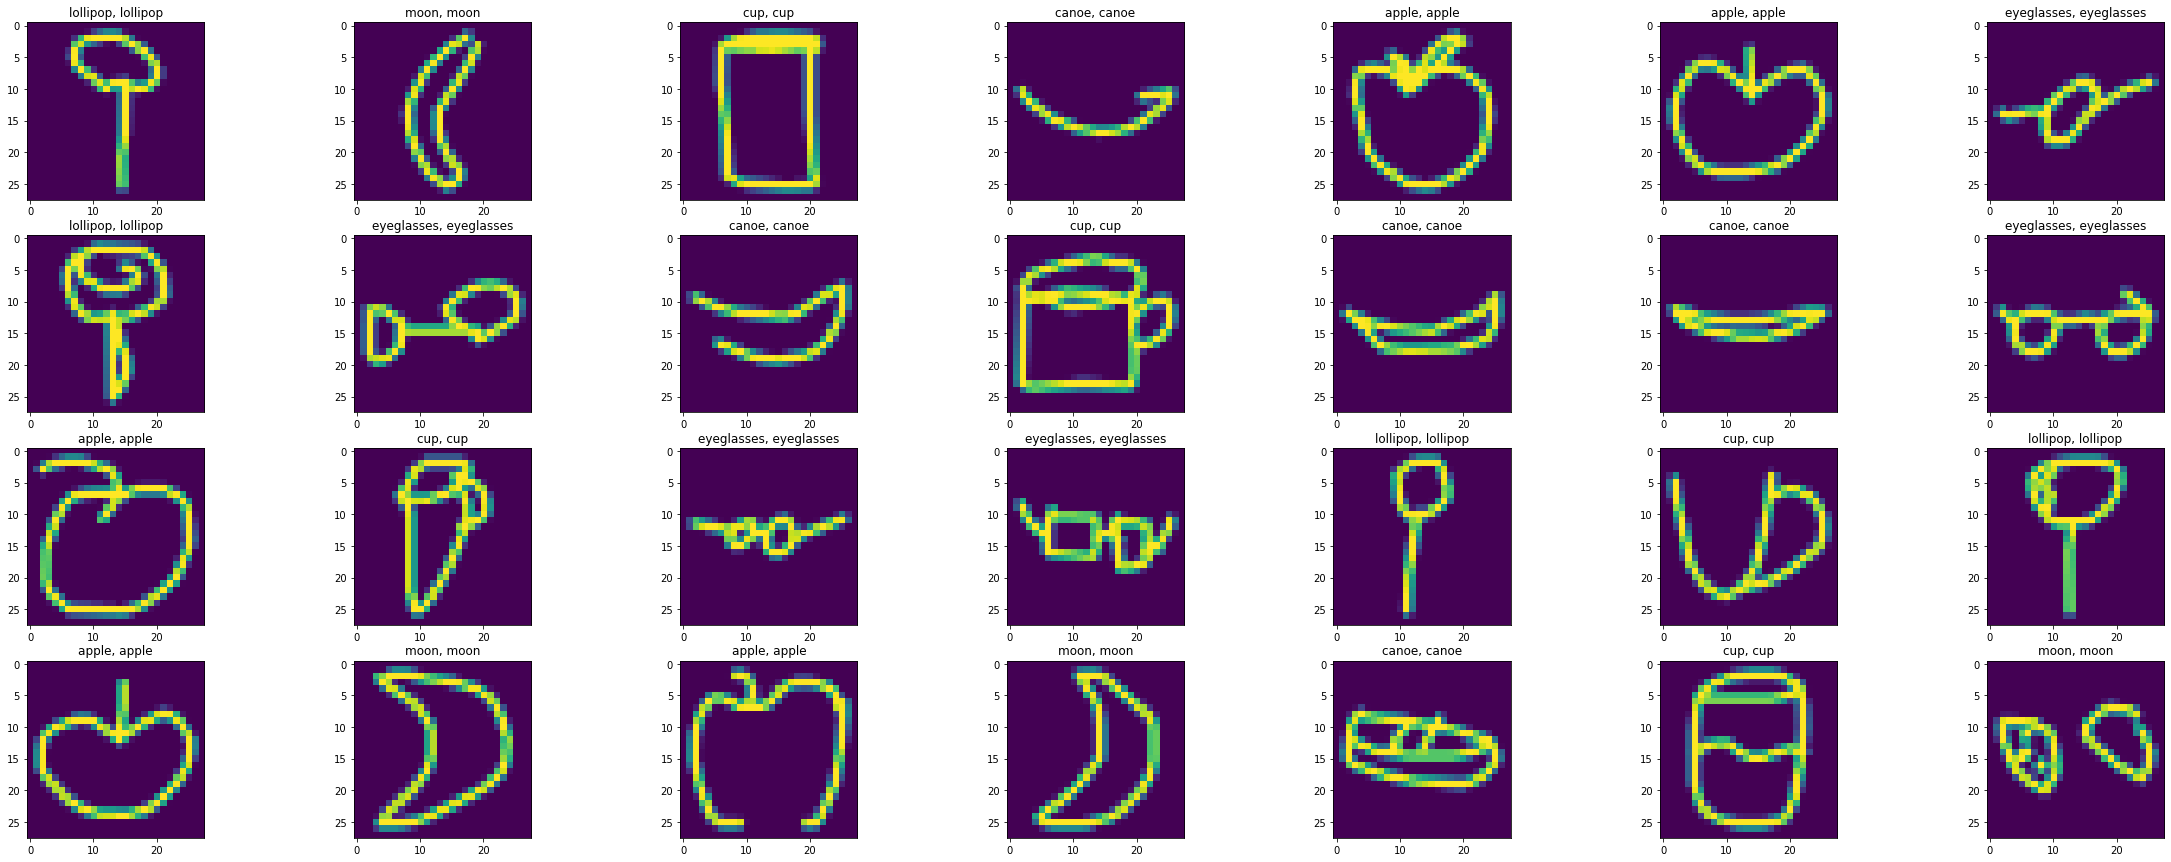

In [36]:
d = ["lollipop", "canoe", "penguin", "eyeglasses", "apple", "moon", "cup"]

# Display the first 40 images
nc = 7
nr = 4
fig, ax = plt.subplots(nr, nc)

plt.rcParams["figure.figsize"] = (40,15)
for i in range(nr):
    for j in range(nc):
        idx = nc * i + j
        ax[i, j].imshow(test[idx].reshape(28, 28))
        predicted_label = np.argmax(model.predict(test[idx].reshape(1, 28, 28, 1)))
        model_label = d[predicted_label]
        actual_label = np.where(test_labels[idx]==1)[0][0]
        if predicted_label != actual_label:
            ax[i, j].set_title(d[actual_label] + ", " + model_label, color='r')
        else:
            ax[i, j].set_title(d[actual_label] + ", " + model_label)
plt.show()

In [37]:
# Which images in the test set are we most confident about? Which of these were right and which were wrong?
true_label_certainty = np.zeros(len(test))
predicted_label_certainty = np.zeros(len(test))
predicted_labels = np.zeros(len(test))
misclassified_class_1 = []
misclassified_class_2 = []

for i in range(len(test)):
    if i % 64 == 0:
        print(i // 16)
    true_label = np.argmax(test_labels[i])
    predictions = model.predict(test[i].reshape(1, 28, 28, 1))
    predicted_label = np.argmax(predictions)
    predicted_labels[i] = predicted_label
    if predicted_label == true_label:
        true_label_certainty[i] = predictions[0][predicted_label]
    else:
        predicted_label_certainty[i] = predictions[0][predicted_label]
        misclassified_class_1.append(true_label)
        misclassified_class_2.append(predicted_label)

0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
208
212
216
220
224
228
232
236
240
244
248
252
256
260
264
268
272
276
280
284
288
292
296
300
304
308
312
316
320
324
328
332
336
340
344
348
352
356
360
364
368
372
376
380
384
388
392
396
400
404
408
412
416
420
424
428
432
436
440
444
448
452
456
460
464
468
472
476
480
484
488
492
496
500
504
508
512
516
520
524
528
532
536
540
544
548
552
556
560
564
568
572
576
580
584
588
592
596
600
604
608
612
616
620
624
628
632
636
640
644
648
652
656
660
664
668
672
676
680
684
688
692
696
700
704
708
712
716
720
724
728
732
736
740
744
748
752
756
760
764
768
772
776
780
784
788
792
796
800
804
808
812
816
820
824
828
832
836
840
844
848
852
856
860
864
868
872
876
880
884
888
892
896
900
904
908
912
916
920
924
928
932
936
940
944
948
952
956
960
964
968
972
976
980
984


In [38]:
best = true_label_certainty.argsort()[-20:][::-1] # indices of images the network was "most right" about
worst = predicted_label_certainty.argsort()[-20:][::-1] # indices of images the network was "least right" about

Best Images


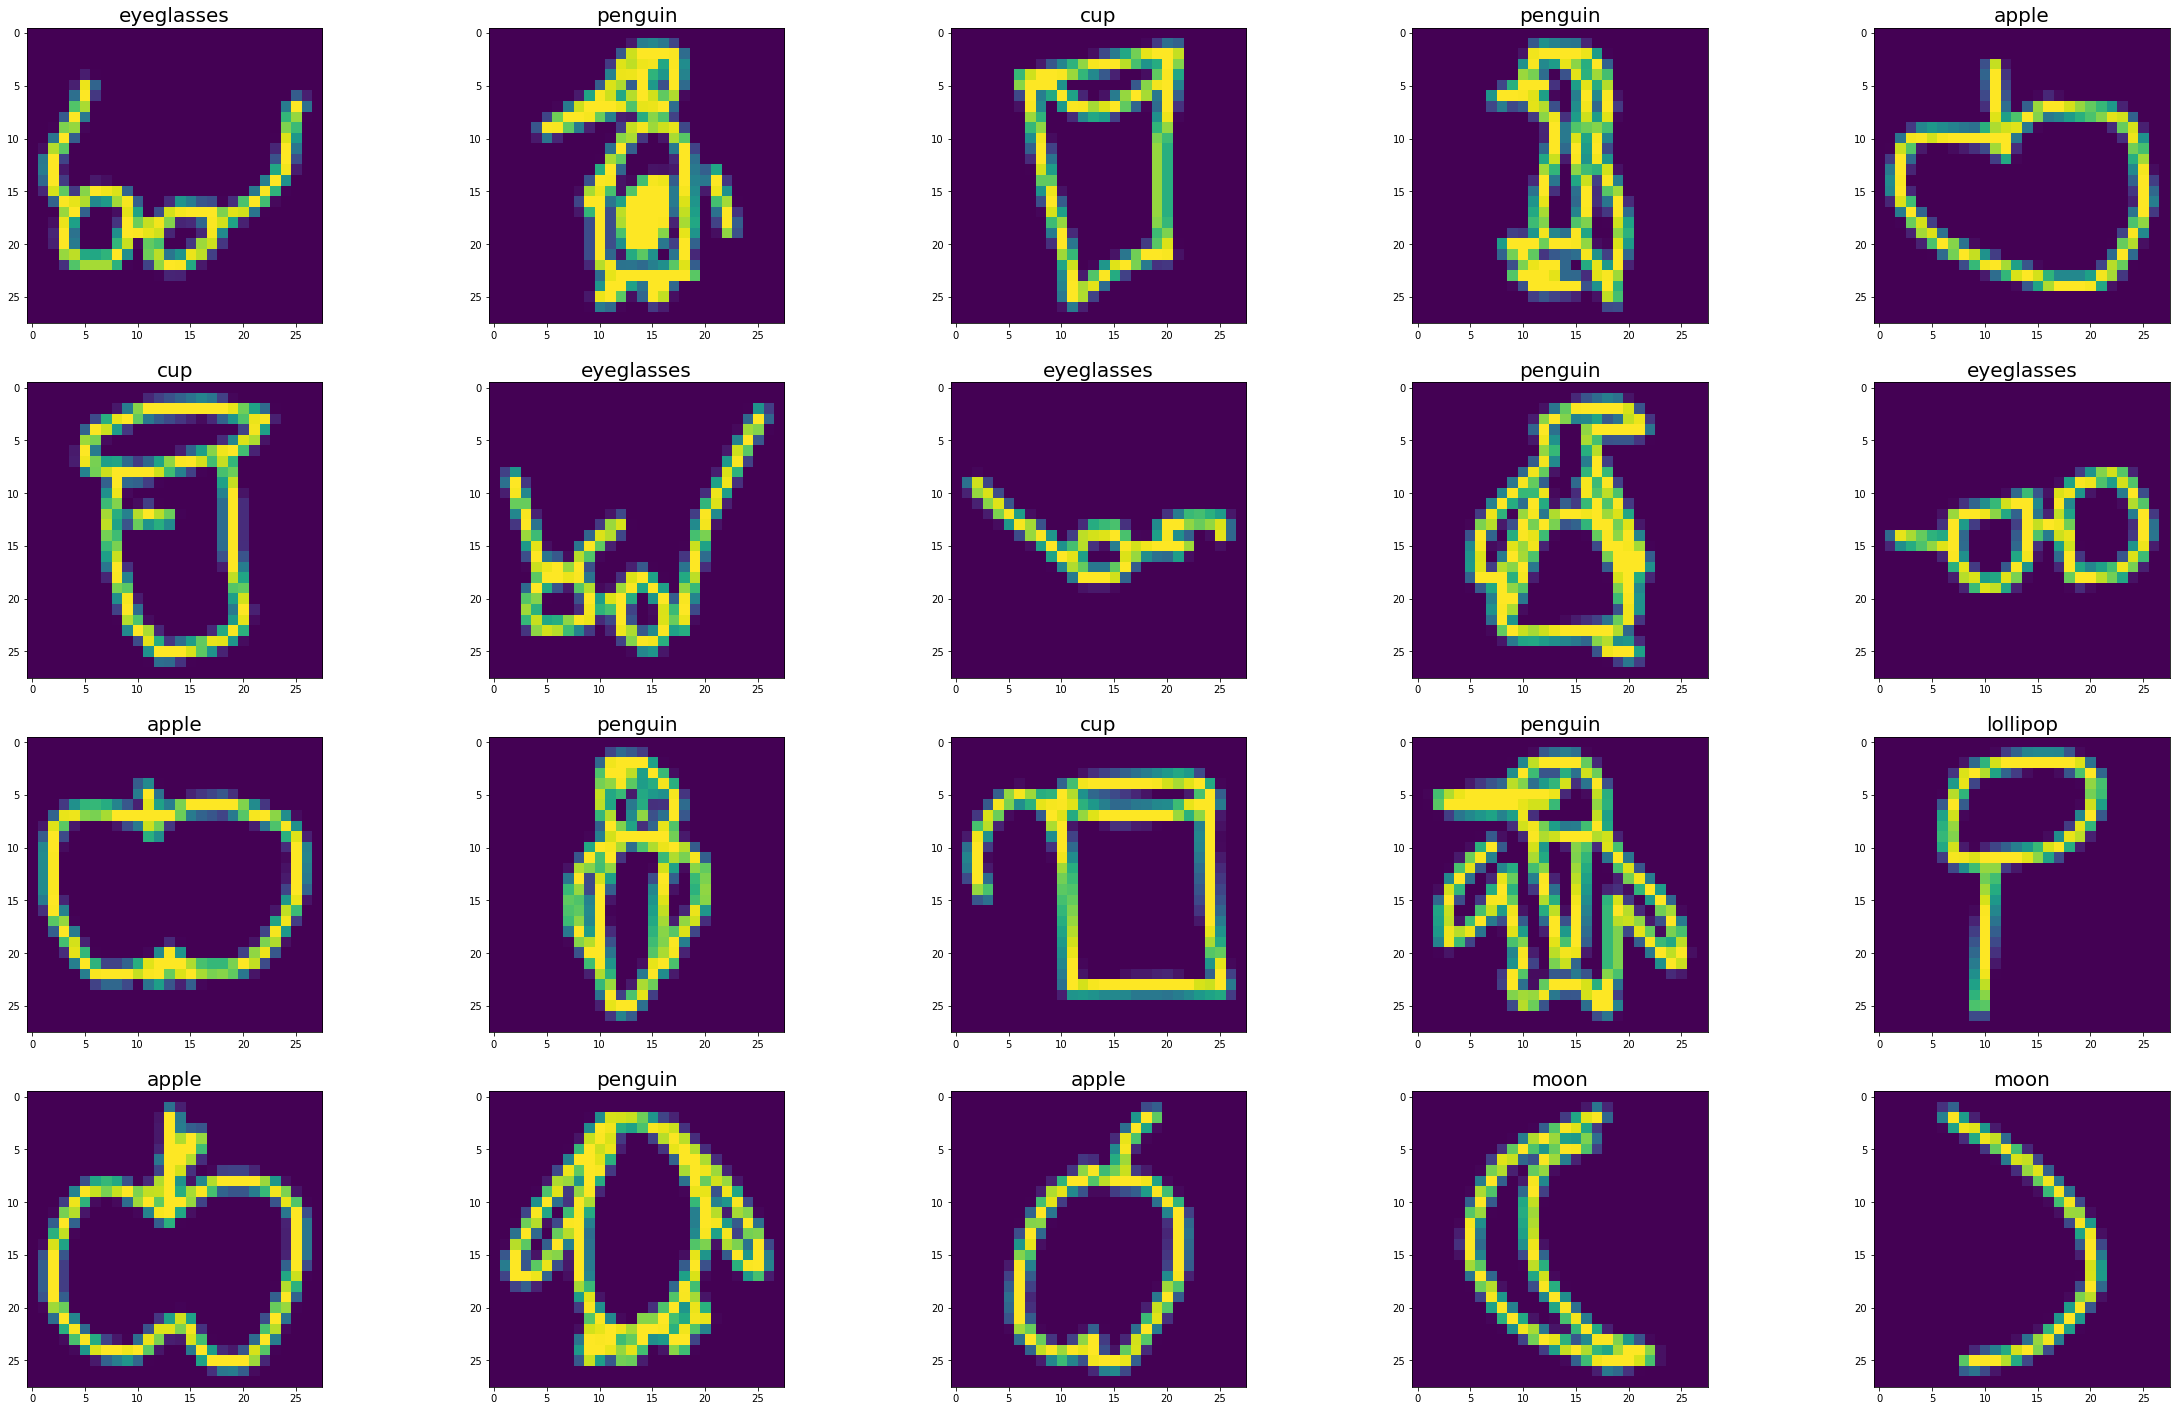

In [39]:
print("Best Images")
plt.rcParams["figure.figsize"] = (40,25)
fig, ax = plt.subplots(4, 5)
nc = 5
for i in range(4):
    for j in range(5):
        idx = nc * i + j
        idx = best[idx]
        ax[i, j].imshow(test[idx].reshape(28, 28))
        ax[i, j].set_title(d[int(predicted_labels[idx])], fontsize=20)
plt.show()

Worst Images


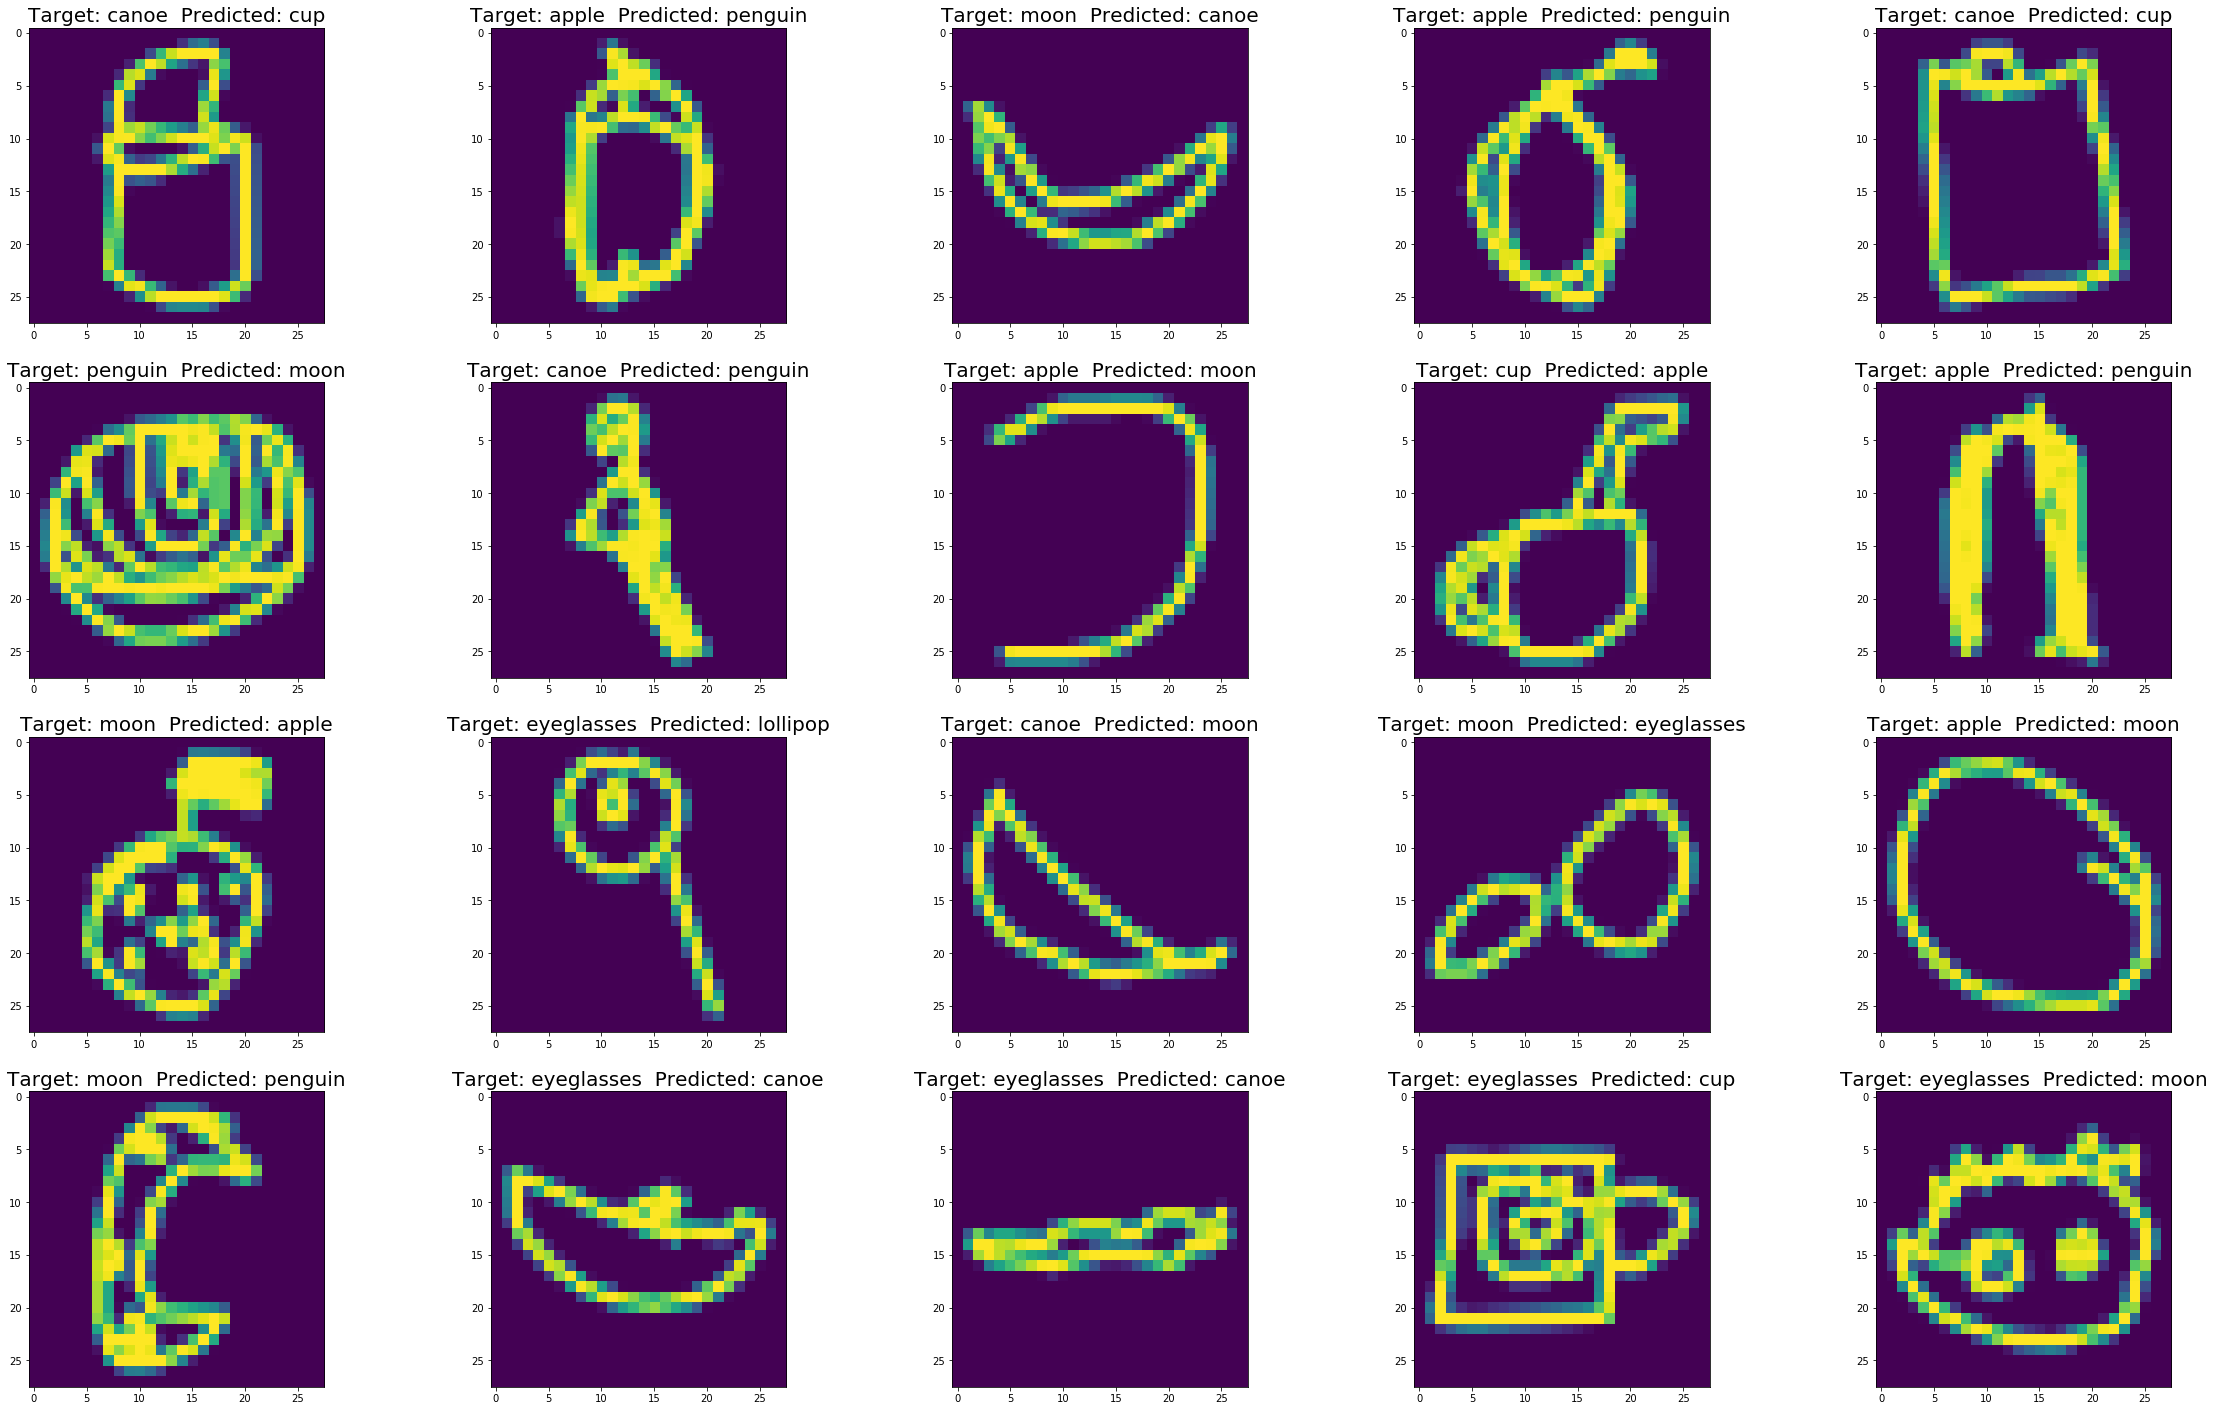

In [40]:
print("Worst Images")
plt.rcParams["figure.figsize"] = (40,25)
fig, ax = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        idx = nc * i + j
        idx = worst[idx]
        ax[i, j].imshow(test[idx].reshape(28, 28))
        model_label = d[np.where(test_labels[idx]==1)[0][0]]
        ax[i, j].set_title("Target: " + model_label + "  Predicted: " + d[int(predicted_labels[idx])], fontsize=20)
plt.show()

[Text(0, 0, 'lollipop'),
 Text(0, 0, 'canoe'),
 Text(0, 0, 'penguin'),
 Text(0, 0, 'eyeglasses'),
 Text(0, 0, 'apple'),
 Text(0, 0, 'moon'),
 Text(0, 0, 'cup')]

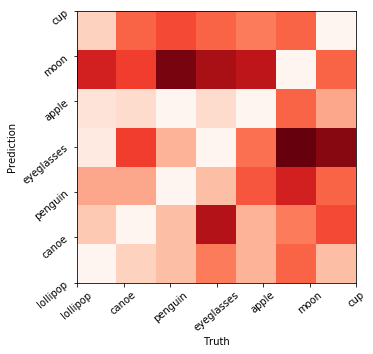

In [41]:
# One more question: are there some objects that are easier to recognize than others? 
# Hypothesis: the moon and canoe will be most difficult to distinguish between (or maybe also apples 
# because they all have big circles)
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots(1,1) 
ax.hist2d(misclassified_class_1, misclassified_class_2, cmap=plt.cm.Reds, bins=len(d))
ax.set_ylabel("Prediction")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(d, rotation=40, fontsize=10)
plt.xlabel("Truth")
ax.set_yticks(np.arange(len(d)))
ax.set_yticklabels(d, rotation=40, fontsize=10)

In [3]:
# Lastly, let's compare this to our crazy-good VGG model
new_model = tf.keras.models.load_model('saved_models/VGG_model')
batch_size = 32

dat_path = pathlib.Path('object_files/').glob('*.npz')
_, _, _, _, test, test_labels = load_data.load_for_cnn(dat_path, 
                                                       28, 
                                                       {"lollipop":0, "canoe":1, "penguin":2, "eyeglasses":3, "apple":4, "moon":5, "cup":6},
                                                       (0.7, 0.25), 
                                                       channel_axes=3, 
                                                       dim_new=32)
test_dataset = tf.data.Dataset.from_tensor_slices((test, test_labels))
test_batches = test_dataset.batch(batch_size)

loss_test, accuracy_test = new_model.evaluate(test_batches)

493/493 [==============================] - 228s 462ms/step - loss: 0.0561 - accuracy: 0.9833


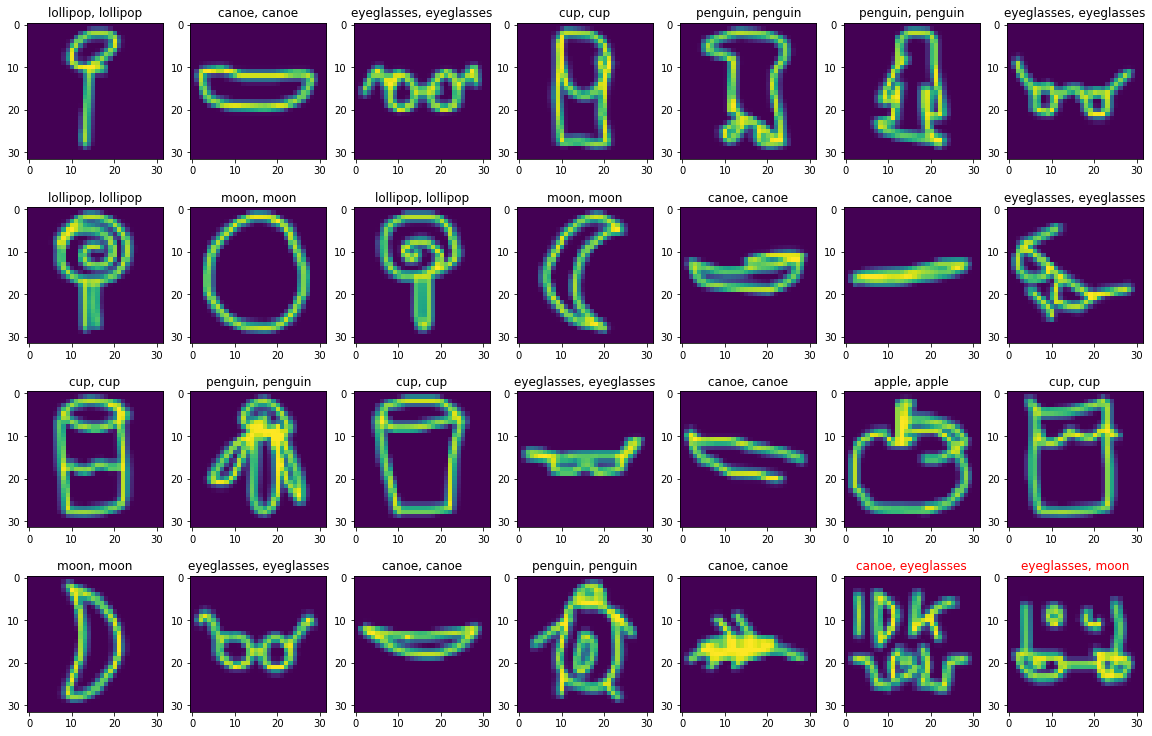

In [9]:
d = ["lollipop", "canoe", "penguin", "eyeglasses", "apple", "moon", "cup"]
nc = 7
nr = 4
fig, ax = plt.subplots(nr, nc)

plt.rcParams["figure.figsize"] = (20,13)

for i in range(nr):
    for j in range(nc):
        idx = nc * i + j
        ax[i, j].imshow(test[idx, :, :, 0].reshape(32, 32))
        predicted_label = np.argmax(new_model.predict(test[idx].reshape(1, 32, 32, 3)))
        model_label = d[predicted_label]
        actual_label = np.where(test_labels[idx]==1)[0][0]
        if predicted_label != actual_label:
            ax[i, j].set_title(d[actual_label] + ", " + model_label, color='r', fontsize=12)
        else:
            ax[i, j].set_title(d[actual_label] + ", " + model_label, fontsize=12)
plt.show()

In [10]:
# Which images in the test set are we most confident about? Which of these were right and which were wrong?
true_label_certainty_new = np.zeros(len(test))
predicted_label_certainty_new = np.zeros(len(test))
predicted_labels_new = np.zeros(len(test))
misclassified_class_1_new = []
misclassified_class_2_new = []

for i in range(len(test)):
    if i % 64 == 0:
        print(i // 16)
    true_label = np.argmax(test_labels[i])
    predictions = new_model.predict(test[i].reshape(1, 32, 32, 3))
    predicted_label = np.argmax(predictions)
    predicted_labels_new[i] = predicted_label
    if predicted_label == true_label:
        true_label_certainty_new[i] = predictions[0][predicted_label]
    else:
        predicted_label_certainty_new[i] = predictions[0][predicted_label]
        misclassified_class_1_new.append(true_label)
        misclassified_class_2_new.append(predicted_label)

0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
208
212
216
220
224
228
232
236
240
244
248
252
256
260
264
268
272
276
280
284
288
292
296
300
304
308
312
316
320
324
328
332
336
340
344
348
352
356
360
364
368
372
376
380
384
388
392
396
400
404
408
412
416
420
424
428
432
436
440
444
448
452
456
460
464
468
472
476
480
484
488
492
496
500
504
508
512
516
520
524
528
532
536
540
544
548
552
556
560
564
568
572
576
580
584
588
592
596
600
604
608
612
616
620
624
628
632
636
640
644
648
652
656
660
664
668
672
676
680
684
688
692
696
700
704
708
712
716
720
724
728
732
736
740
744
748
752
756
760
764
768
772
776
780
784
788
792
796
800
804
808
812
816
820
824
828
832
836
840
844
848
852
856
860
864
868
872
876
880
884
888
892
896
900
904
908
912
916
920
924
928
932
936
940
944
948
952
956
960
964
968
972
976
980
984


In [20]:
best_new = true_label_certainty_new.argsort()[-40:][::-1] # indices of images the network was "most right" about
worst_new = predicted_label_certainty_new.argsort()[-40:][::-1] # indices of images the network was "least right" about

Best Images


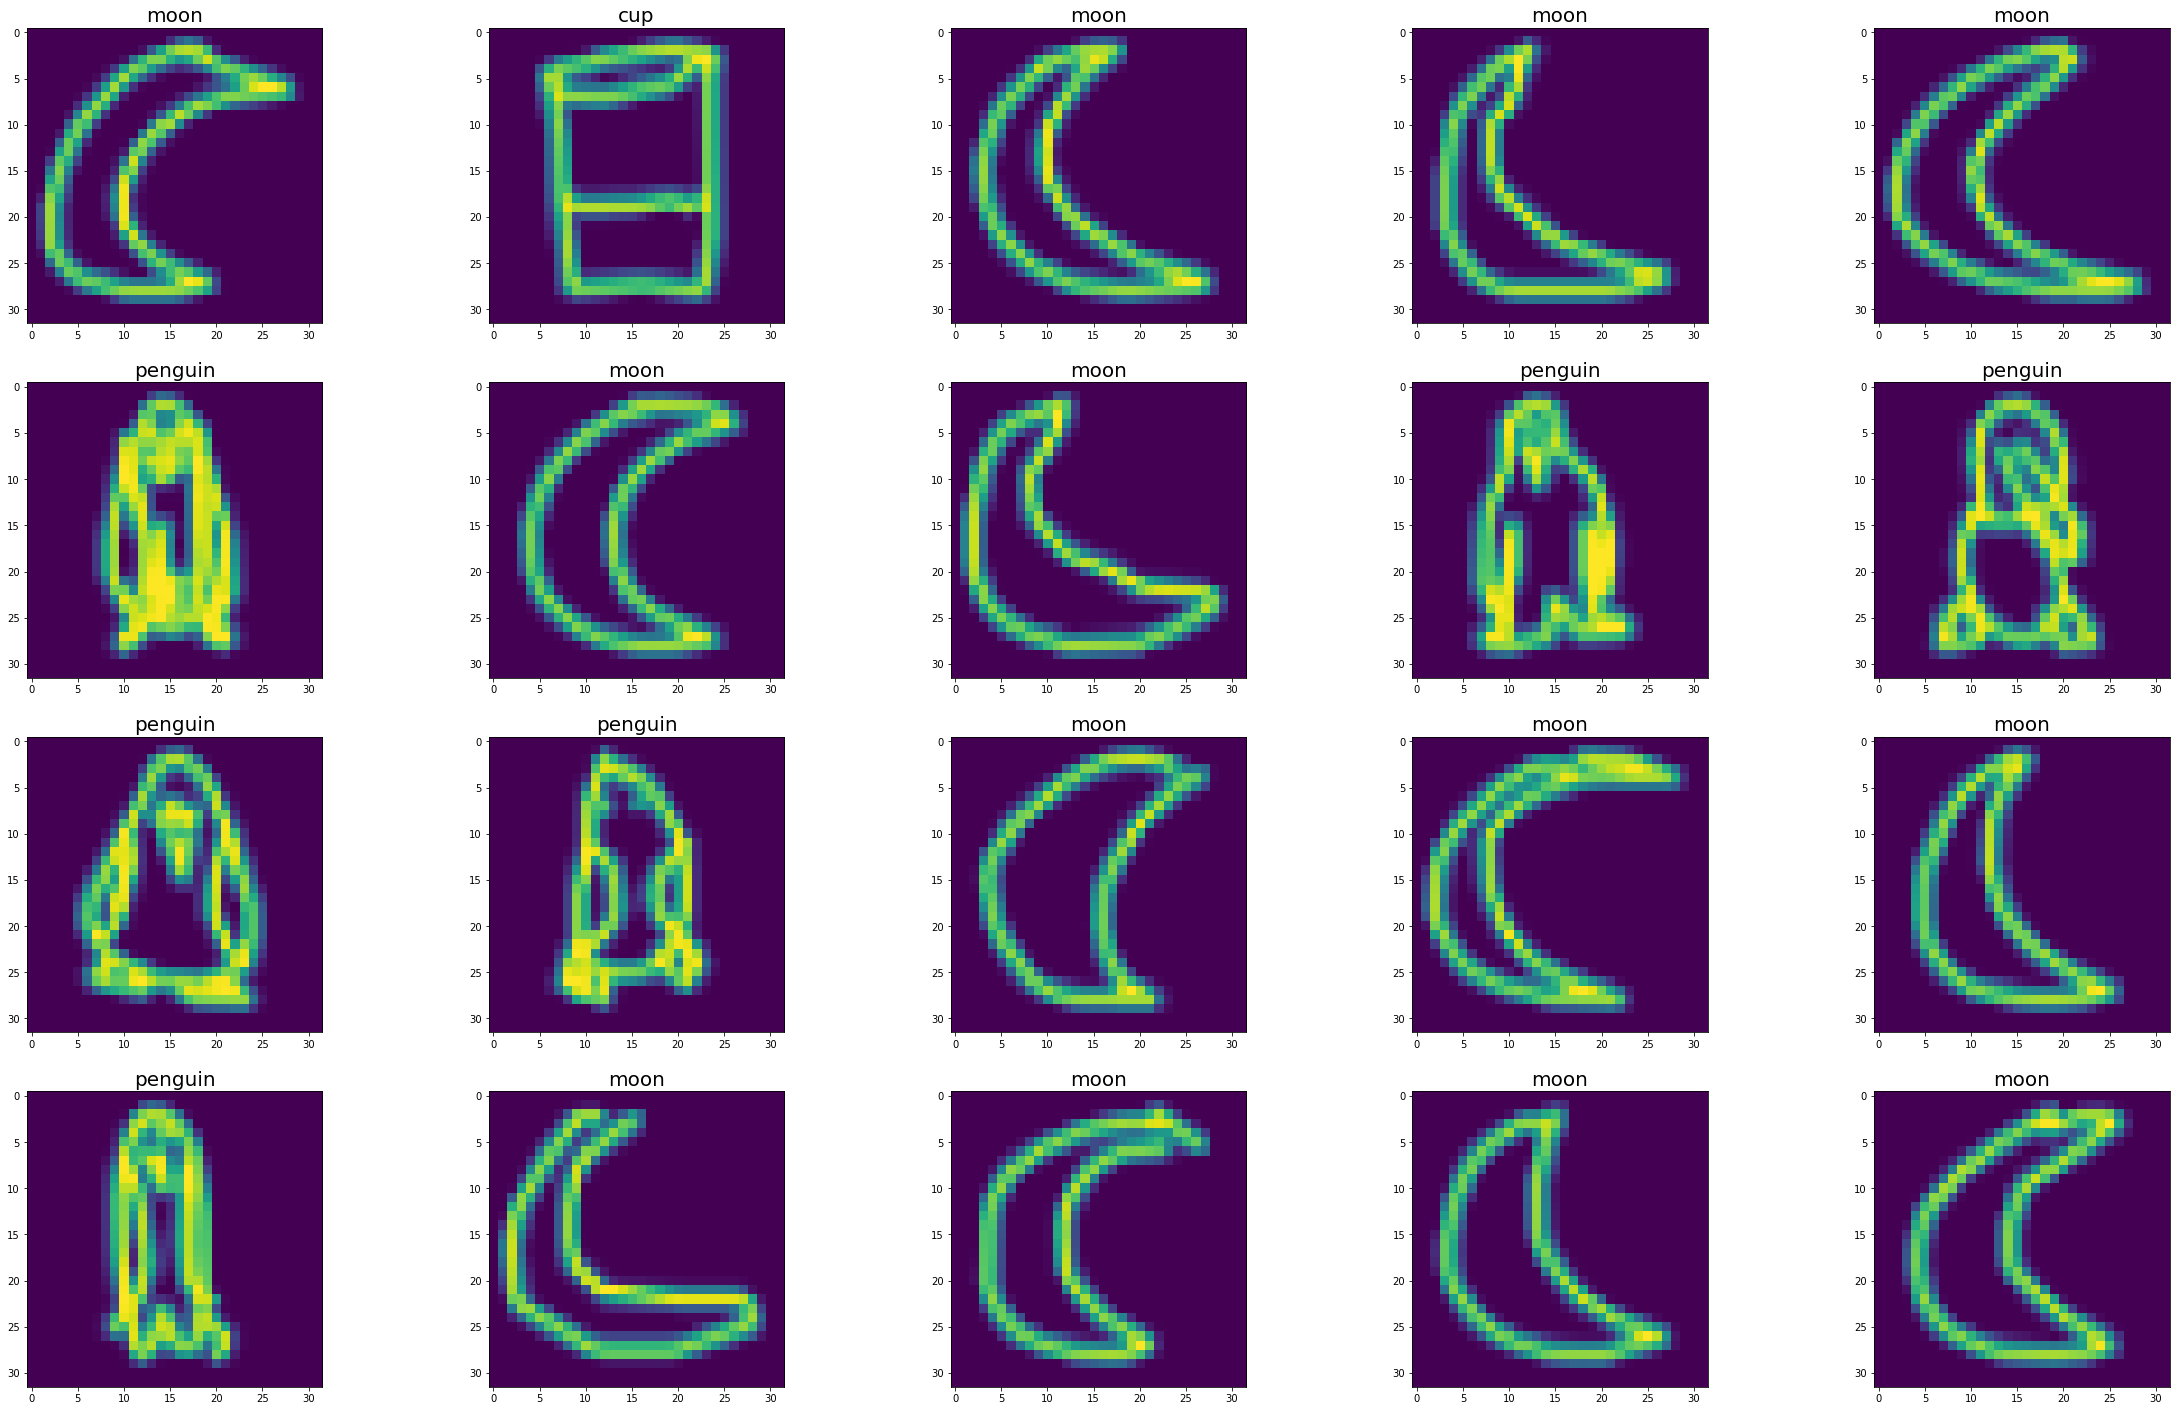

In [16]:
print("Best Images")
plt.rcParams["figure.figsize"] = (40,25)
fig, ax = plt.subplots(4, 5)
nc = 5
for i in range(4):
    for j in range(5):
        idx = nc * i + j
        idx = best_new[idx]
        ax[i, j].imshow(test[idx, :, :, 0].reshape(32, 32))
        ax[i, j].set_title(d[int(predicted_labels_new[idx])], fontsize=20)
plt.show()

Worst Images


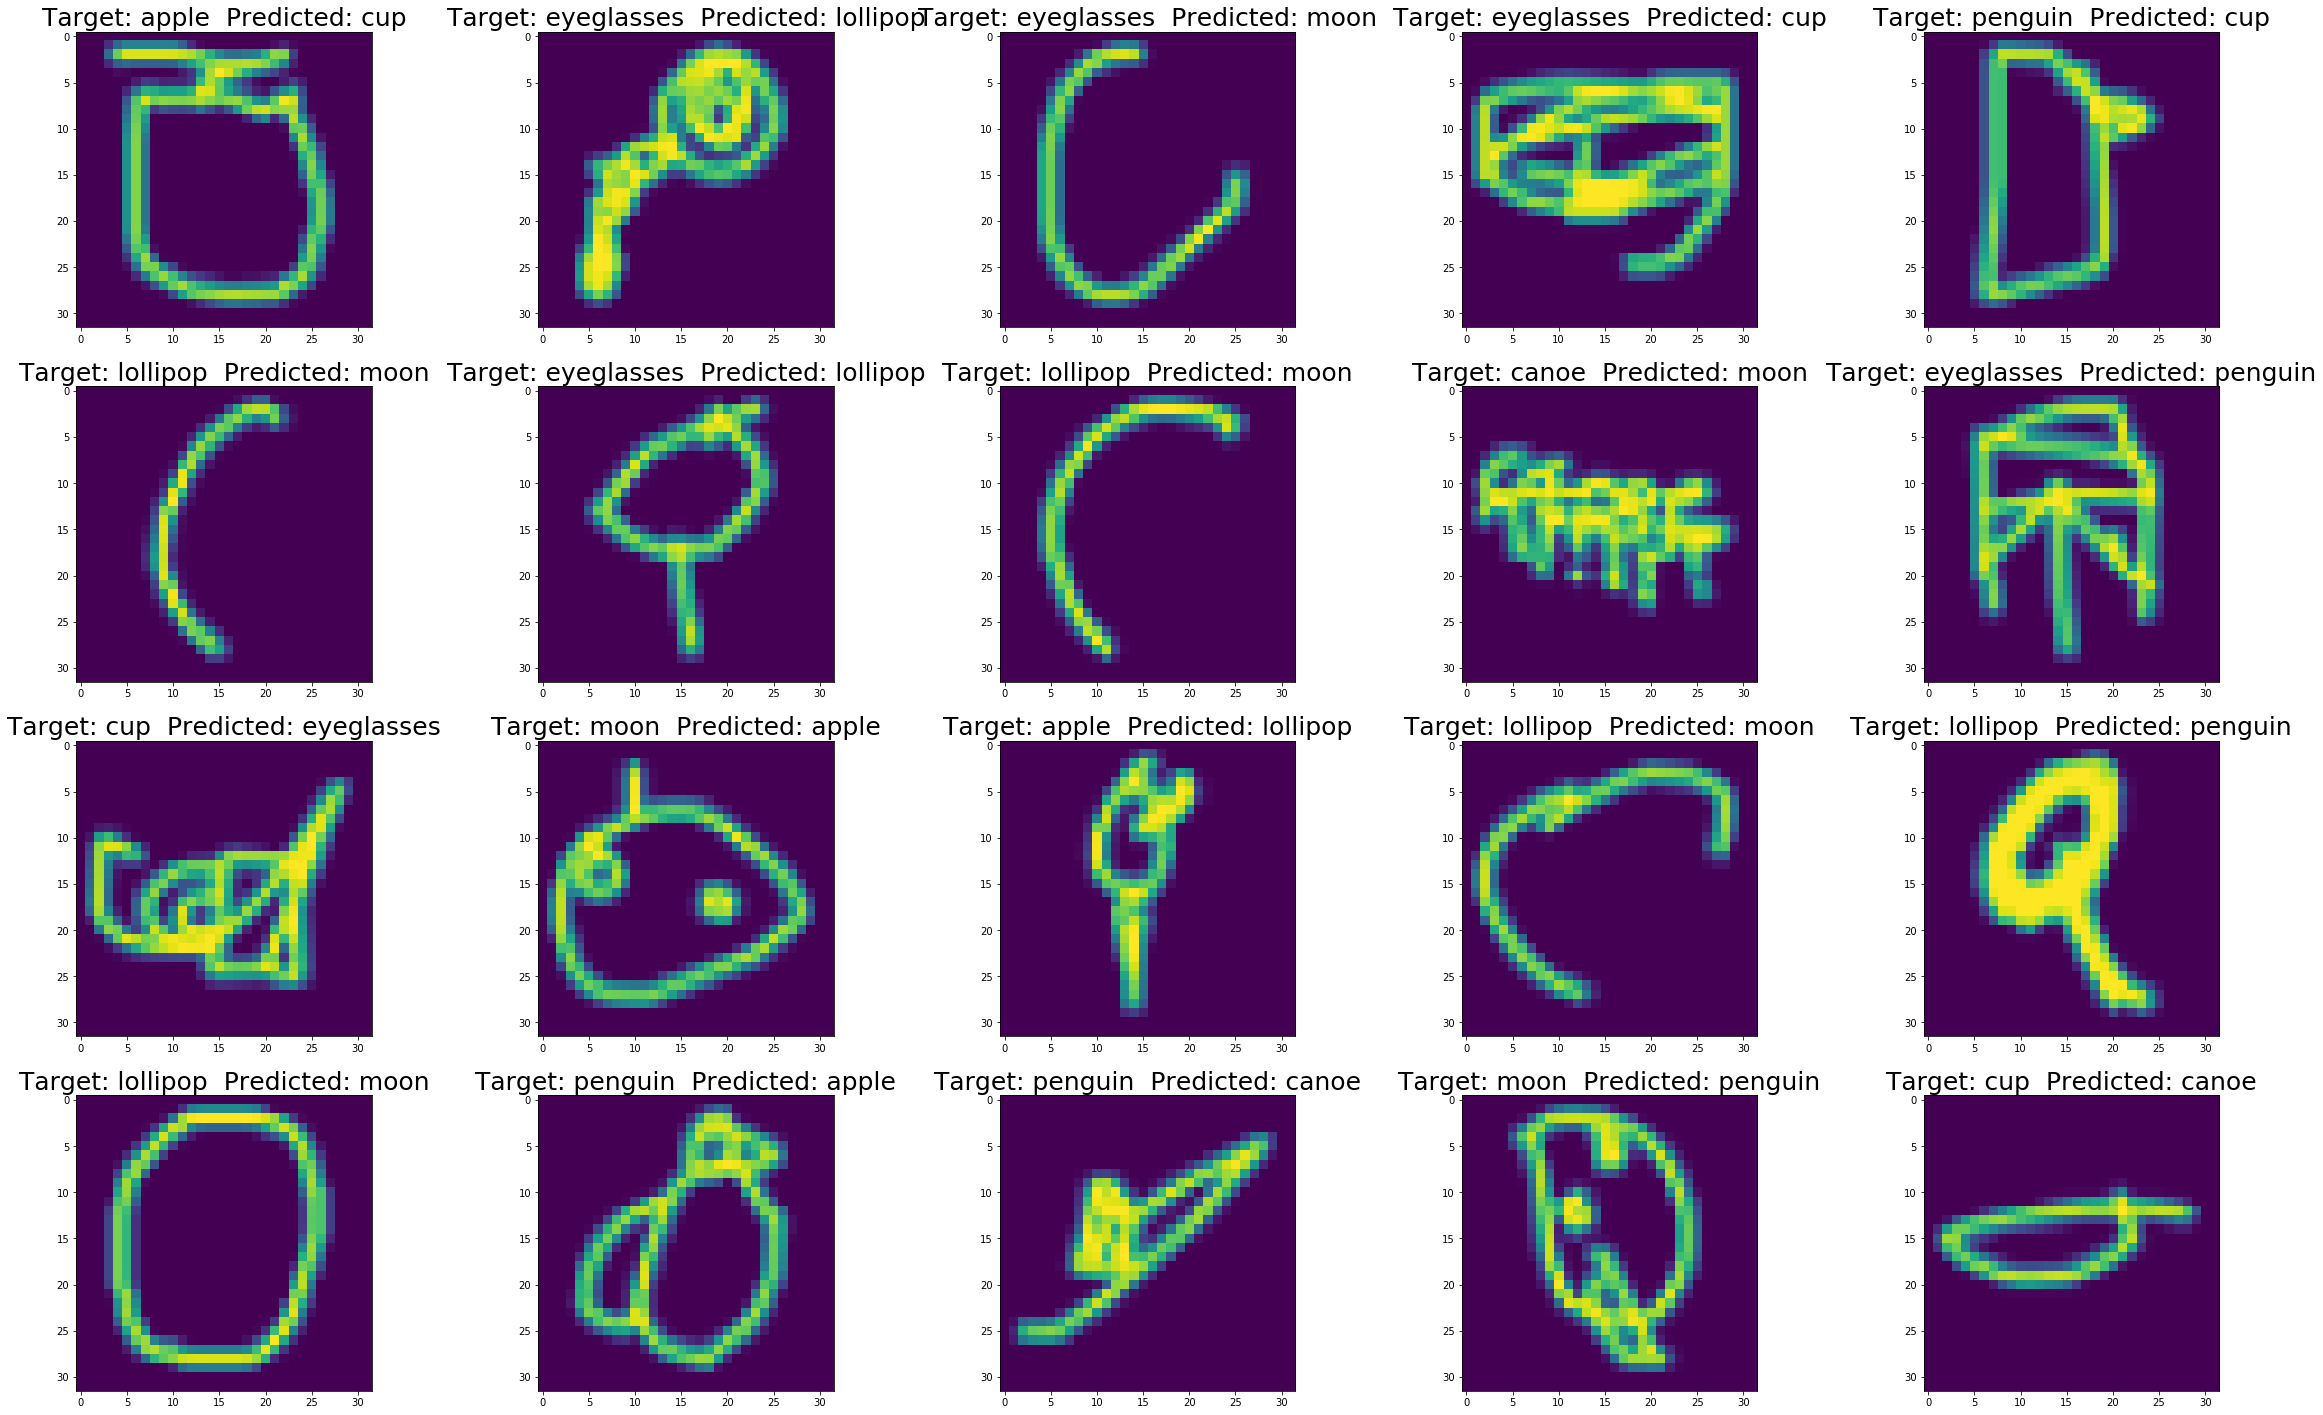

In [26]:
print("Worst Images")
plt.rcParams["figure.figsize"] = (40,25)
fig, ax = plt.subplots(4, 5)
for i in range(2, 6): # skipping a row due to profanity
    for j in range(5):
        idx = nc * i + j
        idx = worst_new[idx]
        ax[i-2, j].imshow(test[idx, :, :, 0].reshape(32, 32))
        model_label = d[np.where(test_labels[idx]==1)[0][0]]
        ax[i-2, j].set_title("Target: " + model_label + "  Predicted: " + d[int(predicted_labels_new[idx])], fontsize=25)
plt.show()

[Text(0, 0, 'lollipop'),
 Text(0, 0, 'canoe'),
 Text(0, 0, 'penguin'),
 Text(0, 0, 'eyeglasses'),
 Text(0, 0, 'apple'),
 Text(0, 0, 'moon'),
 Text(0, 0, 'cup')]

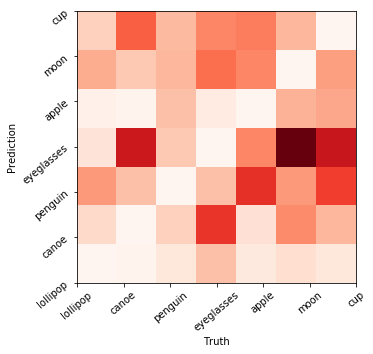

In [27]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots(1,1) 
ax.hist2d(misclassified_class_1_new, misclassified_class_2_new, cmap=plt.cm.Reds, bins=len(d))
ax.set_ylabel("Prediction")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(d, rotation=40, fontsize=10)
plt.xlabel("Truth")
ax.set_yticks(np.arange(len(d)))
ax.set_yticklabels(d, rotation=40, fontsize=10)

In [118]:
# Finally, let's visualize the activations for some input images--be sure to cite this properly!!
def get_activations(img):
    layer_outputs = [layer.output for layer in model.layers[:-4]] # exclude the dense layers
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    activations = activation_model.predict(img) # Returns a list of Numpy arrays: one array per layer activation

    layer_names = []
    for layer in model.layers[:-4]:
        layer_names.append(layer.name)

    images_per_row = 16
    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

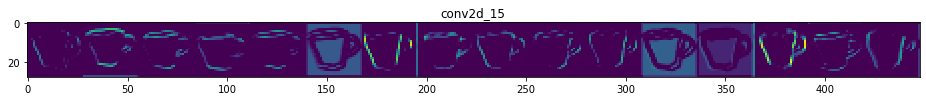

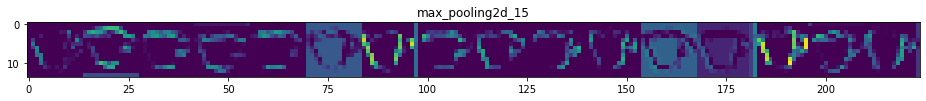

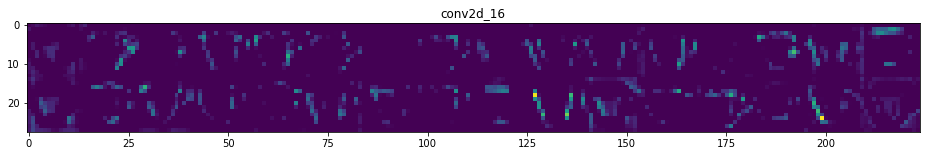

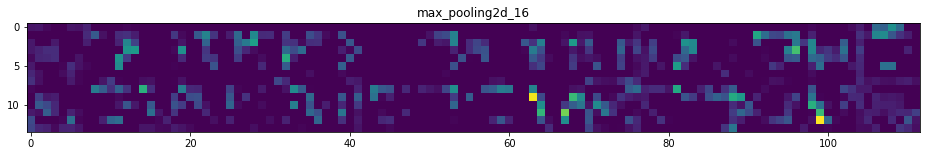

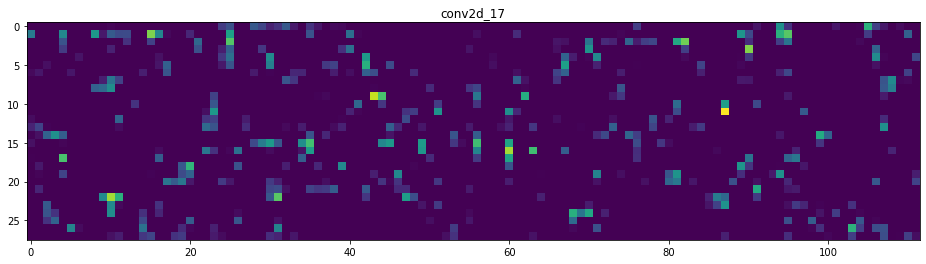

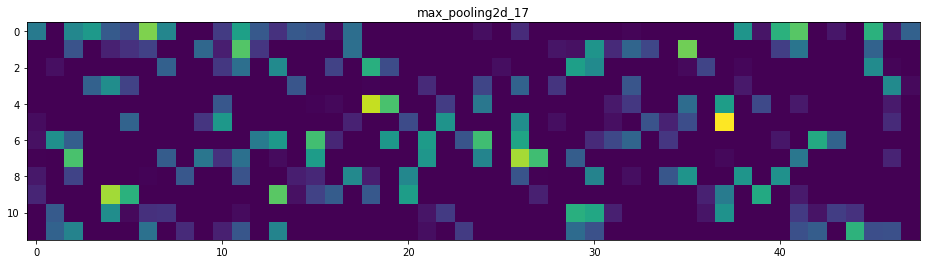

In [119]:
img = test[0].reshape(1, 28, 28, 1)
get_activations(img)

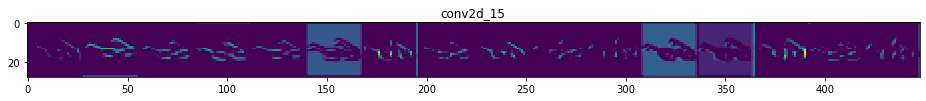

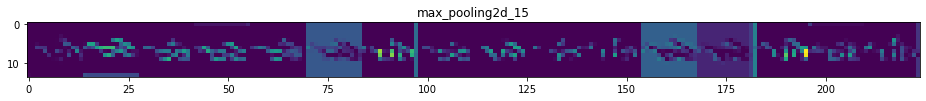

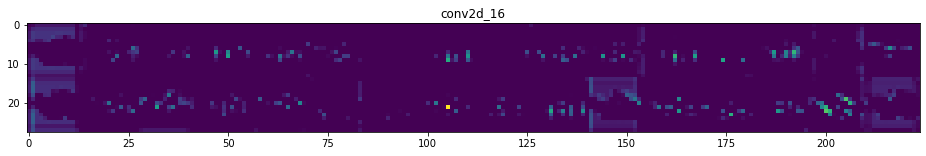

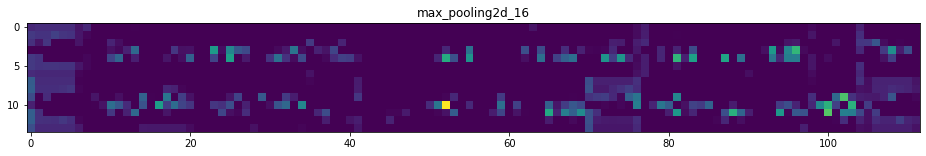

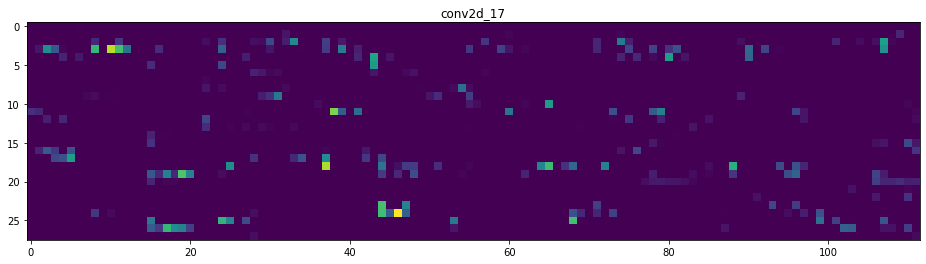

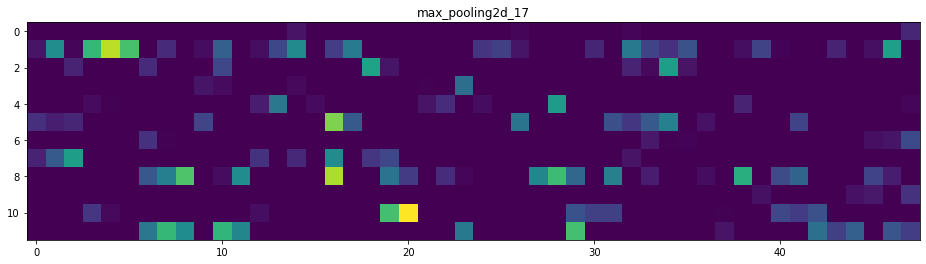

In [120]:
img = test[1].reshape(1, 28, 28, 1)
get_activations(img)

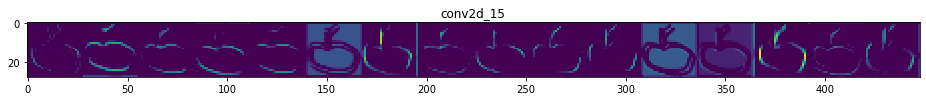

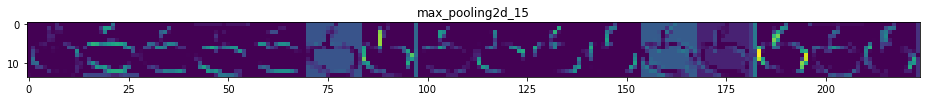

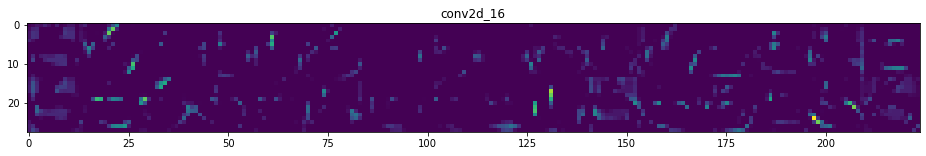

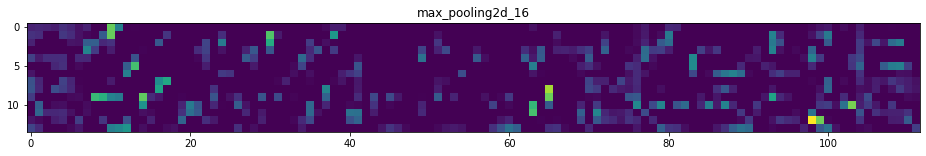

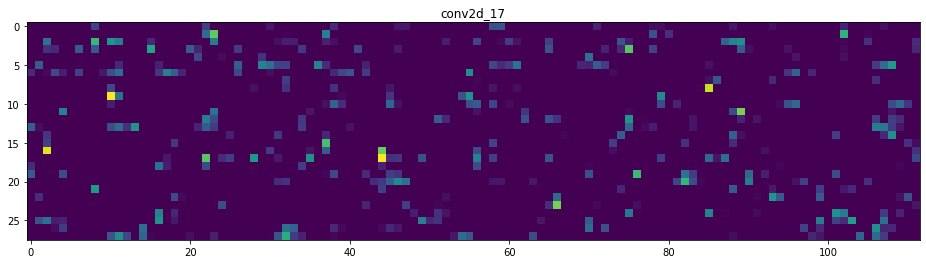

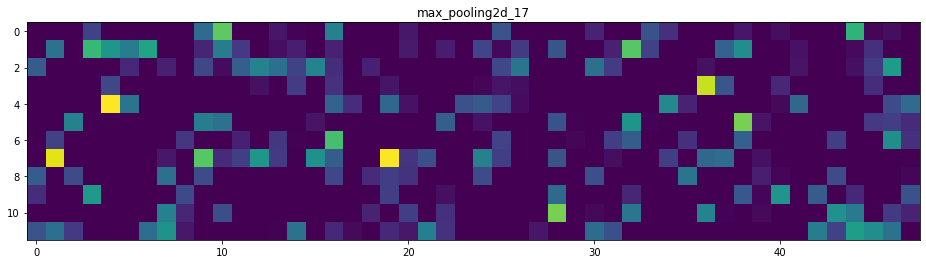

In [121]:
img = test[3].reshape(1, 28, 28, 1)
get_activations(img)